In [12]:
# Import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge

In [50]:
# Build your `wrangle` function
def wrangle(path):
    df = pd.read_excel(path)
    # Apartments in Mexico City
    df.drop(columns = 'Unnamed: 0', inplace  = True)
    mask1 = df["property_type"] == "apartment"
    mask2 = df['place_with_parent_names'].str.contains('Capital Federal')
    mask3 = df["price_aprox_usd"] < 400_000
    
    df = df[mask1 & mask2 & mask3]
    
    # Between quantiles 0.1 and 0.9
    low, high = df['surface_covered_in_m2'].quantile([0.1,0.9])
    mask4 = df['surface_covered_in_m2'].between(low,high)
    
    df = df[mask4]
    
    # Separate 'lat' and 'lon' columns
    lat= df['lat-lon'].str.split(',',expand = True)[0].astype('float')
    lon= df['lat-lon'].str.split(',',expand = True)[1].astype('float')
    df['lat'] = lat
    df['lon'] = lon
    df.drop(columns = 'lat-lon', inplace = True)
    
    # Boroughs
    neighbourhood = df['place_with_parent_names'].str.split('|', expand = True)[1]
    df['borough'] = neighbourhood
    df.drop(columns="place_with_parent_names", inplace=True)
    
    # Dropping columns with more than 50% null values
    df.drop(columns = ['floor', 'rooms', 'expenses', 'rooms', 'price_usd_per_m2', 'surface_total_in_m2'], inplace = True) 
    
    # Dropping low and high carninality columns
    df.drop(columns = ['operation', 'currency', 'property_type', 'properati_url'], inplace = True)
    
    # Dropping Leakages
    df.drop(columns = ['price', 'price_aprox_local_currency',  'price_per_m2'], inplace = True)
    
    return df
    

In [54]:
files = glob.glob('buenos-aires-real-estate-*.xlsx')
files

['buenos-aires-real-estate-2.xlsx',
 'buenos-aires-real-estate-1.xlsx',
 'buenos-aires-real-estate-5.xlsx',
 'buenos-aires-real-estate-3.xlsx',
 'buenos-aires-real-estate-4.xlsx']

In [56]:
frames = [wrangle(file) for file in files]

In [58]:
frames[1]

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
4,129000.00,70.0,-34.584651,-58.454693,Argentina
9,87000.00,42.0,-34.638979,-58.500115,Argentina
29,118000.00,54.0,-34.615847,-58.459957,Argentina
40,57000.00,42.0,-34.625222,-58.382382,Argentina
41,90000.00,50.0,-34.610610,-58.412511,Argentina
...,...,...,...,...,...
8589,73536.95,42.0,-34.631591,-58.370191,Argentina
8590,119000.00,41.0,-34.604555,-58.418206,Argentina
8593,62000.00,43.0,-34.624002,-58.390588,Argentina
8601,125000.00,70.0,-34.601455,-58.378132,Argentina


In [60]:
df = pd.concat(frames)
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
2,215000.00,35.0,-34.588993,-58.400133,Argentina
9,341550.00,90.0,-34.588044,-58.398066,Argentina
12,91156.62,33.0,-34.623320,-58.397461,Argentina
13,105000.00,33.0,-34.553897,-58.451939,Argentina
17,89681.00,39.0,-34.628813,-58.472230,Argentina


Text(0.5, 1.0, 'Distribution of Apartment Prices')

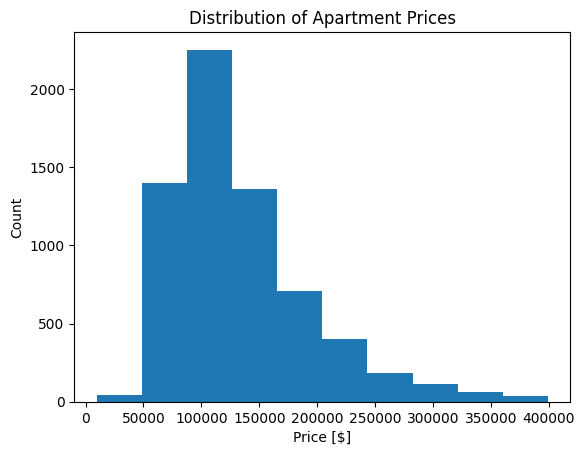

In [62]:
# Build histogram
plt.hist(df["price_aprox_usd"])


# Label axes
plt.xlabel('Price [$]')
plt.ylabel("Count")
# Add title

plt.title("Distribution of Apartment Prices")


Text(0.5, 1.0, 'Mexico City: Price vs. Area')

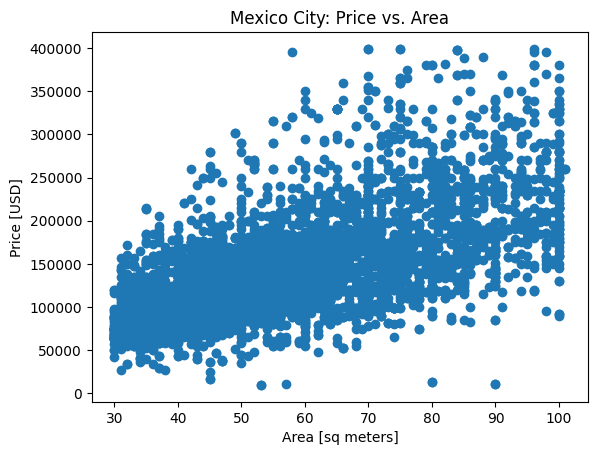

In [63]:
# Build scatter plot
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
# Add title

plt.title("Mexico City: Price vs. Area")